In [3]:
# import modules

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [4]:
# feature collection
# listed date; price, days on market, year built, age, lot.size, address

# load the csv
df = pd.read_csv('Vancouver.csv', header=0)
columns = df.columns
print(columns)

Index(['Id', 'MlsNumber', 'PublicRemarks_', 'Individual_', 'PostalCode',
       'HistoricalDataIsCleared', 'ProvinceName', 'RelativeDetailsURL',
       'StatusId_', 'PhotoChangeDateUTC',
       ...
       'Property.CommunityFeatures', 'Property.Features',
       'Property.MaintenanceFee', 'Property.PoolType',
       'Property.TransactionType', 'Property.TransactionTypeId',
       'Property.ViewType', 'Property.TaxAmount',
       'UploadedByAddress.AddressText', 'UploadedByAddress.PermitShowAddress'],
      dtype='object', length=117)


In [5]:
# visualize the data (show the first 5 rows)
df.head()

,Id,MlsNumber,PublicRemarks_,Individual_,PostalCode,HistoricalDataIsCleared,ProvinceName,RelativeDetailsURL,StatusId_,PhotoChangeDateUTC,...,Property.CommunityFeatures,Property.Features,Property.MaintenanceFee,Property.PoolType,Property.TransactionType,Property.TransactionTypeId,Property.ViewType,Property.TaxAmount,UploadedByAddress.AddressText,UploadedByAddress.PermitShowAddress
0,26429211,R2842819,Rarely available E Unit in the well managed Co...,"[{'IndividualID': 1432454, 'Name': 'Elizabeth ...",V6Z2T8,False,British Columbia,/real-estate/26429211/5e-139-drake-street-vanc...,1,2024-01-19 12:50:52 AM,...,Pets Allowed,"Central location, Elevator",$790.98 Monthly,Indoor pool,For sale,2.0,View,"$2,816.84","2433 Spruce Street, Vancouver, British Columbi...",True
1,26476802,R2846463,This spacious and modern SE corner unit in the...,"[{'IndividualID': 1427149, 'Name': 'Shannon Ez...",V6B0E6,False,British Columbia,/real-estate/26476802/1406-128-w-cordova-stree...,1,2024-02-06 1:32:46 AM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,26520398,R2850298,"Welcome to PARK&METRO by Marcon, this spacious...","[{'IndividualID': 1957105, 'Name': 'Kevin Chen...",V5X2Y7,False,British Columbia,/real-estate/26520398/107-7928-yukon-street-va...,1,2024-02-16 12:51:01 AM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,25409218,R2763176,"Awesome 2 bed-2 bath at SPARROW, this amazing ...","[{'IndividualID': 1432774, 'Name': 'Mario Feli...",V6A1X6,False,British Columbia,/real-estate/25409218/505-239-keefer-street-va...,1,2024-01-15 9:22:39 PM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,26403555,R2840739,Welcome to Aquarius II by Concord Pacific. Spa...,"[{'IndividualID': 1875598, 'Name': 'Shine Li',...",V6Z2Y4,False,British Columbia,/real-estate/26403555/2901-198-aquarius-mews-v...,1,2024-01-14 6:11:53 PM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# basic statistic about the data
df.describe()

,Id,StatusId_,Distance,InsertedDateUTC_,UploadedBy_,Building.BathroomTotal_,Building.Bedrooms_,Building.StoriesTotal_,Property.Address.Longitude_,Property.Address.Latitude_,...,Building.ConstructedDate,Building.DisplayAsYears,Building.BuiltIn,Land.SizeTotal,Property.Address.Longitude,Property.Address.Latitude,Property.ParkingSpaceTotal,Property.TypeId,Property.PriceUnformattedValue,Property.TransactionTypeId
count,6.000000e+02,600.0,0.0,6.000000e+02,600.0,525.000000,525.000000,1.0,600.000000,600.000000,...,1.0,1.0,1.0,1.0,1.000000,1.000000,1.0,1.0,1.0,1.0
mean,2.629642e+07,1.0,NaN,6.383726e+17,89.0,2.220952,2.346667,1.0,-123.103491,49.260983,...,1995.0,0.0,1995.0,0.0,-123.121854,49.272645,1.0,300.0,1000000.0,2.0
std,2.872086e+05,0.0,NaN,7.655594e+13,0.0,0.712979,0.861504,NaN,0.035828,0.028374,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2.392132e+07,1.0,NaN,6.377702e+17,89.0,0.000000,0.000000,1.0,-123.215110,49.200705,...,1995.0,0.0,1995.0,0.0,-123.121854,49.272645,1.0,300.0,1000000.0,2.0
25%,2.622269e+07,1.0,NaN,6.383404e+17,89.0,2.000000,2.000000,1.0,-123.125771,49.239479,...,1995.0,0.0,1995.0,0.0,-123.121854,49.272645,1.0,300.0,1000000.0,2.0
50%,2.639711e+07,1.0,NaN,6.384037e+17,89.0,2.000000,2.000000,1.0,-123.115001,49.269663,...,1995.0,0.0,1995.0,0.0,-123.121854,49.272645,1.0,300.0,1000000.0,2.0
75%,2.646684e+07,1.0,NaN,6.384235e+17,89.0,2.000000,3.000000,1.0,-123.078606,49.279457,...,1995.0,0.0,1995.0,0.0,-123.121854,49.272645,1.0,300.0,1000000.0,2.0
max,2.652885e+07,1.0,NaN,6.384399e+17,89.0,5.000000,8.000000,1.0,-123.025029,49.315157,...,1995.0,0.0,1995.0,0.0,-123.121854,49.272645,1.0,300.0,1000000.0,2.0


In [7]:
# select a few columns as the features
# TODO: add 'TimeOnRealtor', 'Property.OwnershipType','PriceChangeDateUTC'
selected_features = df[['Property.Type','Property.ParkingSpaceTotal',
                        'Property.Address.Longitude','Property.Address.Latitude',
                        'Building.BathroomTotal', 'Building.Bedrooms',
                        'Property.ParkingSpaceTotal','Building.SizeInterior',
                        'InsertedDateUTC']]
print(selected_features.head())
# sns.pairplot(selected_features)

   Property.Type  Property.ParkingSpaceTotal  Property.Address.Longitude  \
0  Single Family                         1.0                 -123.121854   
1            NaN                         NaN                         NaN   
2            NaN                         NaN                         NaN   
3            NaN                         NaN                         NaN   
4            NaN                         NaN                         NaN   

   Property.Address.Latitude  Building.BathroomTotal  Building.Bedrooms  \
0                  49.272645                     2.0                2.0   
1                        NaN                     NaN                NaN   
2                        NaN                     NaN                NaN   
3                        NaN                     NaN                NaN   
4                        NaN                     NaN                NaN   

   Property.ParkingSpaceTotal Building.SizeInterior  InsertedDateUTC  
0                    

In [9]:
# separate features and target (we want to predice the price in this case)

# convert fields to right types
# get all the property types
property_types = np.unique(selected_features['Property.Type'])
property_map = {
    'Business': 0,
    'Industrial': 1,
    'Office': 2,
    'Retail': 3,
    'Single Family': 4,
    'Vacant Land': 5
}
if not pd.api.types.is_numeric_dtype(selected_features['Property.Type'].dtype):
    selected_features['Property.Type'] = selected_features['Property.Type'].map(property_map)
if not pd.api.types.is_numeric_dtype(df['Property.Price'].dtype):
    df['Property.Price'] = df['Property.Price'].str.replace(",", "").str.replace("$","").astype(int)
if not pd.api.types.is_float_dtype(selected_features['Building.SizeInterior'].dtype):
    selected_features['Building.SizeInterior'] = selected_features['Building.SizeInterior'].str.replace("sqft", "").astype(float)

selected_features.fillna(0, inplace=True)
# focus on a range

# Assuming df is your DataFrame and you want to filter based on longitude and latitude ranges
# Define the range of longitude and latitude
# min_latitude = 49.312965  # Replace with your minimum longitude value
# max_latitude = 49.408667  # Replace with your maximum longitude value
# min_longitude = -123.29345  # Replace with your minimum latitude value
# max_longitude = -123.118063 # Replace with your maximum latitude value

# # Filter the DataFrame based on longitude and latitude ranges
# selected_features = selected_features[(df['Property.Address.Longitude'] >= min_longitude) &
#                  (selected_features['Property.Address.Longitude'] <= max_longitude) &
#                  (selected_features['Property.Address.Latitude'] >= min_latitude) &
#                  (selected_features['Property.Address.Latitude'] <= max_latitude)]

selected_features = selected_features.drop(columns=[
     'Building.SizeInterior',
    'Property.Address.Latitude','InsertedDateUTC'])
Y = df[['Property.Price']]
X = selected_features



TypeError: '<' not supported between instances of 'float' and 'str'

In [ ]:
# Split the data to train and test dataset.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1)


In [ ]:
# Support vector machine algorithm
# from sklearn.svm import SVC
# svn = SVC()
# svn.fit(X_train, y_train)

# use linear regression
# from sklearn.linear_model import LinearRegression
# model = LinearRegression()
# model.fit(X_train, y_train)
import math
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge, Lasso
count = 0
alpha_values = []
mean_mse_scores = []
optimal_alpha = 0
min_mean_mse_score = float("inf")
# while count <= 1:
#     count += 0.01
#     model = Ridge(alpha=count)
#     # Perform cross-validation
#     cv_scores = cross_val_score(model, X, Y, cv=10, scoring='neg_mean_squared_error')  # Use 5-fold cross-validation
#     mse_scores = -cv_scores  # Convert negative MSE scores to positive
    
#     alpha_values.append(count)
#     mean_mse_score = math.sqrt(mse_scores.mean())
#     mean_mse_scores.append(mean_mse_score)
#     if mean_mse_score < min_mean_mse_score:
#         min_mean_mse_score = mean_mse_score
#         optimal_alpha = count
#     # print("Cross-Validation Mean MSE:", mean_mse_score)
#     # print("Cross-Validation Standard Deviation:", mse_scores.std())

# plt.figure(figsize=(10, 6))
# plt.plot(alpha_values, mean_mse_scores, marker='o', linestyle='-')
# plt.title('Mean MSE vs. Alpha Values')
# plt.xlabel('Alpha')
# plt.ylabel('Mean MSE')
# plt.grid(True)
# plt.xticks(alpha_values)
# plt.show()
# print(optimal_alpha)
optimal_alpha = 0.02
model = Ridge(alpha=optimal_alpha)
model.fit(X_train, y_train)
# use SVR
# from sklearn.svm import SVR
# from sklearn.preprocessing import StandardScaler
# Initialize a StandardScaler
# scaler = StandardScaler()

# # Fit the scaler to the training data and transform both the training and testing data
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)
# model = SVR(kernel='poly')  # kernel type ('linear', 'poly', 'rbf', etc.)
# model.fit(X_train_scaled, y_train)


Ridge(alpha=0.02)

In [ ]:
# y_pred = model.predict(X_test_scaled).ravel()
y_pred = model.predict(X_test)
y_actual = y_test.values.flatten()
# results = pd.DataFrame({'Predicted': y_pred, 'Actual': y_actual,
#                         })
# print(results)

In [ ]:
from sklearn.metrics import mean_squared_error, accuracy_score, r2_score, classification_report
def accuracy_with_threshold(y_true, y_pred, threshold):
    # Compute accuracy without threshold
    accuracy = accuracy_score(y_true, y_pred)
    
    # Compute number of elements with absolute difference greater than threshold
    diff_count = sum(abs(y_true - y_pred) > threshold)
    
    # Adjust accuracy based on the difference count
    adjusted_accuracy = (len(y_true) - diff_count) / len(y_true)
    
    return adjusted_accuracy

# Calculate the accuracy only for svn
# adjusted_accuracy = accuracy_with_threshold(y_test, y_pred, 100000)
# Calculate mean squared error 
# (all differences between actual value and predicted value)
mse = mean_squared_error(y_test, y_pred)
# Calculate R-squared
# coefficient of determination
# R-squared is a measure of how well the independent
# variables explain the variability of the dependent variable
# It ranges from 0 to 1, with higher values 
# indicating a better fit of the model to the data.
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)
# print(classification_report(y_test, y_pred))
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)

Mean Squared Error: 19400388232.121696
R-squared: 0.10605470425259245


In [ ]:
# analysis the data

# Coefficient Magnitude
coefficients = model.coef_[0]
for feature, coefficient in zip(X.columns, coefficients):
    print(f"{feature}: {coefficient}")
# # """
# # based on the coefficients, we know Building.BathroomTotal
# # is the most useful feature
# # """
# # # Statistical Significance
# import statsmodels.api as sm
# # # Add a constant column to the features matrix for the intercept term
# X = sm.add_constant(X)
# model = sm.OLS(Y, X)
# result = model.fit()

# print(result.summary())


Property.Type: -75749.4297358694
Property.ParkingSpaceTotal: -2340.818146553094
Property.Address.Longitude: -459560.3814099141
Building.BathroomTotal: 44517.31143671946
Building.Bedrooms: 45465.54425326452
Property.ParkingSpaceTotal: -2340.8181465508596


In [ ]:
# use Ensemble Methods such as random forest or grdient boosting
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.ensemble import RandomForestRegressor

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_regressor = RandomForestRegressor(random_state=42,
                                     n_estimators=500,
                                     max_depth=10)

# Perform grid search with cross-validation
# grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
# grid_search.fit(X_train, y_train)

# Print the best hyperparameters
# print("Best hyperparameters:", grid_search.best_params_)

# Fit the model to the training data
rf_regressor.fit(X_train, y_train)
# Make predictions on the test data
# Get the best model
# best_rf_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred = rf_regressor.predict(X_test)

# Evaluate the model's performance using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Random Forest MSE:", mse)
# Coefficient Magnitude
feature_importances = rf_regressor.feature_importances_

# Print feature importances
for i, importance in enumerate(feature_importances):
    print(f"Feature {X_train.columns.to_list()[i]}: {importance}")



outer_scores = []

# Calculate R-squared
# coefficient of determination
# R-squared is a measure of how well the independent
# variables explain the variability of the dependent variable
# It ranges from 0 to 1, with higher values 
# indicating a better fit of the model to the data.
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


# perform cross validation: k-fold

# Initialize the KFold cross-validator
# kf = KFold(n_splits=10, shuffle=True, random_state=42)

# # Initialize lists to store performance metrics for each fold
# mse_scores = []
# r2_scores = []
# # conver it to numpy
# X = np.array(X)
# Y = np.array(Y)
# # Iterate over the folds
# for train_index, val_index in kf.split(X):
#     # Split the data into training and validation sets for this fold
#     X_train, X_val = X[train_index], X[val_index]
#     y_train, y_val = Y[train_index], Y[val_index]
    
#     # Initialize and train your model
#     model = RandomForestRegressor(random_state=42,
#                                   n_estimators=500,
#                                   max_depth=10)
#     model.fit(X_train, y_train)
    
#     # Make predictions on the validation set
#     y_pred = model.predict(X_val)
    
#     # Compute the Mean Squared Error (MSE) for this fold
#     mse = mean_squared_error(y_val, y_pred)
#     mse_scores.append(mse)
#     r2 = r2_score(y_test, y_pred)
#     # print("r2: ", r2)
#     r2_scores.append(r2)

# # Compute the average MSE across all folds
# average_mse = np.mean(mse_scores)
# print("Average MSE:", average_mse)
# # r2 = r2_score(y_test, y_pred)
# # print("r2: ", r2)
# average_r2 = np.mean(r2_scores)
# print("Average R-squared:", average_r2)
# outer_cv = KFold(n_splits=5, shuffle=True, random_state=42)

# for train_index, test_index in outer_cv.split(X):
#     # Split the data into training and test sets for this outer fold
#     X_train, X_test = X[train_index], X[test_index]
#     y_train, y_test = Y[train_index], Y[test_index]
    
#     # Initialize the inner KFold cross-validator
#     inner_cv = KFold(n_splits=3, shuffle=True, random_state=42)
    
#     # Initialize the Random Forest model
#     rf = RandomForestRegressor(random_state=42)
    
#     # Initialize GridSearchCV with the Random Forest model, hyperparameter grid, and inner cross-validation
#     grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=inner_cv, scoring='r2')
    
#     # Perform grid search to find the best hyperparameters
#     grid_search.fit(X_train, y_train)
    
#     # Get the best hyperparameters
#     best_params = grid_search.best_params_
    
#     # Train the final model using the best hyperparameters on the entire training set
#     best_model = grid_search.best_estimator_
#     best_model.fit(X_train, y_train)
    
#     # Evaluate the best model on the test set for this outer fold
#     y_pred = best_model.predict(X_test)
#     r2 = r2_score(y_test, y_pred)
#     outer_scores.append(r2)

# Compute the average R-squared across all outer folds
# average_r2 = np.mean(outer_scores)
# print("Average R-squared:", average_r2)

/Users/jocelynlee/Desktop/projects/ai/vancouver_price_prediction/van_house_pred/lib/python3.9/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest MSE: 20051909129.352974
Feature Property.Type: 0.029949396673928184
Feature Property.ParkingSpaceTotal: 0.03462146516694839
Feature Property.Address.Longitude: 0.5624368198368427
Feature Building.BathroomTotal: 0.1989984086159537
Feature Building.Bedrooms: 0.13920932645567932
Feature Property.ParkingSpaceTotal: 0.03478458325064769
Mean Squared Error: 20051909129.352974
R-squared: 0.07603344724513217


Index(['Property.TypeProperty.Price',
       'Property.ParkingSpaceTotalProperty.Price',
       'Property.Address.LongitudeProperty.Price',
       'Building.BathroomTotalProperty.Price',
       'Building.BedroomsProperty.Price',
       'Property.ParkingSpaceTotalProperty.Price'],
      dtype='object')
                            Property.Type  Property.ParkingSpaceTotal  \
Property.Type                    1.000000                    0.376789   
Property.ParkingSpaceTotal       0.376789                    1.000000   
Property.Address.Longitude       0.014282                    0.041297   
Building.BathroomTotal           0.648496                    0.371526   
Building.Bedrooms                0.607655                    0.359456   
Property.ParkingSpaceTotal       0.376789                    1.000000   

                            Property.Address.Longitude  \
Property.Type                                 0.014282   
Property.ParkingSpaceTotal                    0.041297   
Property.Ad

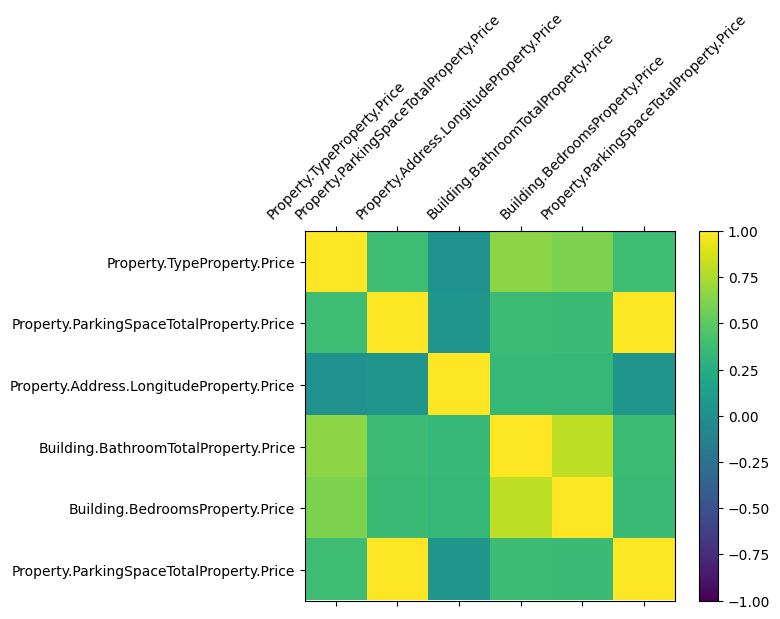

In [ ]:
# check if there is any invalid data
# X = np.array(X)
X.isnull().sum() # all 0

selected_columns = X.columns + Y.columns
print(selected_columns)
correlations = selected_features.corr()
print(correlations)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1,vmax=1)
fig.colorbar(cax)
ticks = np.arange(0, 6, 1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
plt.xticks(fontsize=10, rotation=45)
ax.set_xticklabels(selected_columns.to_list())
ax.set_yticklabels(selected_columns.to_list())
plt.show()
